## Project Objective

##### The  of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease.Machine Learning can play an essential role in predecting presence/absence of Locomotor disorders,Heart diseases and more.
##### The dataset used in this project contains 4 databases concerning heart disease diagnosis. All attributes are numeric-valued. The data was collected from the four following locations:

 1. Cleveland Clinic Foundation (cleveland.data)
 2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
 3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
 4. University Hospital, Zurich, Switzerland (switzerland.data)
 
##### Each database has the same instance format. While the databases have 76 raw attributes, only 14 of them are actually used.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

###                                                            Title: Heart Disease Databases

### Problem Statement
Patients suffering from heart diseases need a heart attack detection system to have a urgent treatment before it’s too late.
This model is aiming to predict the probability that a given patient x will be diagnosed as heart disease, and predict the weights of the features on finding the probability.

### Dataset

In [2]:
df=pd.read_csv(r'C:\Users\nEW u\Desktop\data.csv')

In [3]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0


In [4]:
len(df)

294

In [5]:
df=df.replace(r'\\N',np.nan,regex=True)

In [6]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

### Features Description

In [7]:
df.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0     28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1     29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2     29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3     30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4     31    0   2      100  219   0       1     150     0      0.0     ?  ?   
5     32    0   2      105  198   0       0     165     0      0.0     ?  ?   
6     32    1   2      110  225   0       0     184     0      0.0     ?  ?   
7     32    1   2      125  254   0       0     155     0      0.0     ?  ?   
8     33    1   3      120  298   0       0     185     0      0.0     ?  ?   
9     34    0   2      130  161   0       0     190     0      0.0     ?  ?   
10    34    1   2      150  214   0       1     168     0      0.0     ?  ?   
11    34    1   2 

In [9]:
df.shape

(294, 14)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

#### 5.1 Replacing the missing data with the mean value, using simple mean imputation methods

In [11]:
for c in df.columns[:-1]:
    df[c] = df[c].apply(lambda x: df[df[c]!='?'][c].astype(float).mean() if x == "?" else x)
    df[c] = df[c].astype(float)

#### 5.2 Types of Heart Diseases

In [12]:
set(df.loc[:, "num       "].values)

{0, 1}

##### Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels) 

In [13]:
df.rename(columns = {'num       ':'diagnosis'}, inplace = True) 
   

In [14]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0


###### let's calculate similarities using median

In [15]:
less_50 = df[df["diagnosis"] == 0 ].median().values[:-2]
more_50= df[df["diagnosis"] == 1 ].median().values[:-2]

In [16]:
less_50


array([ 48.        ,   1.        ,   2.        , 130.        ,
       242.        ,   0.        ,   0.        , 144.        ,
         0.        ,   0.        ,   1.89423077,   0.        ])

In [17]:
more_50

array([ 50.,   1.,   4., 135., 256.,   0.,   0., 129.,   1.,   1.,   2.,
         0.])

In [18]:
np.linalg.norm(less_50-more_50)

21.354418445140986

#### Similarity between two types of diagnosis is 21.354418

In [19]:
sim = {"(0,1)": np.linalg.norm(less_50-more_50)}

In [20]:

from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn import cross_validation
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator

from sklearn.cross_validation import KFold

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import seaborn as sns

from IPython.display import Image

%matplotlib inline


C:\Users\nEW u\Anaconda3\data sc\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# we can compare the types of heart disease by using values of each feature separately 
df_1 = df[df["diagnosis"] == 1 ]
df_1[:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
188,31.0,1.0,4.0,120.0,270.0,0.00000,0.0,153.0,1.0,1.5,2.000000,0.0,5.642857,1
189,33.0,0.0,4.0,100.0,246.0,0.00000,0.0,150.0,1.0,1.0,2.000000,0.0,5.642857,1
190,34.0,1.0,1.0,140.0,156.0,0.00000,0.0,180.0,0.0,0.0,1.894231,0.0,5.642857,1
191,35.0,1.0,2.0,110.0,257.0,0.00000,0.0,140.0,0.0,0.0,1.894231,0.0,5.642857,1
192,36.0,1.0,2.0,120.0,267.0,0.00000,0.0,160.0,0.0,3.0,2.000000,0.0,5.642857,1
193,37.0,1.0,4.0,140.0,207.0,0.00000,0.0,130.0,1.0,1.5,2.000000,0.0,5.642857,1
194,38.0,1.0,4.0,110.0,196.0,0.00000,0.0,166.0,0.0,0.0,1.894231,0.0,5.642857,1
195,38.0,1.0,4.0,120.0,282.0,0.00000,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,1
196,38.0,1.0,4.0,92.0,117.0,0.00000,0.0,134.0,1.0,2.5,2.000000,0.0,5.642857,1
197,40.0,1.0,4.0,120.0,466.0,0.06993,0.0,152.0,1.0,1.0,2.000000,0.0,6.000000,1


### 5.3 Finding the range of each feature by disease type

### Age

In [22]:
df_1.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  df_1.groupby(["diagnosis", ])["age"].max().astype(str)

diagnosis
1    31.0, 66.0
Name: age, dtype: object

#### Thus,The minimum age is 31 and maximum age is 66

In [23]:
df_1.groupby(["diagnosis", ])["age"].mean()

diagnosis
1    49.481132
Name: age, dtype: float64

#### Thus, Mean of age is 49.48

### SEX

In [24]:
df_1.groupby(["diagnosis", "sex"])["age"].count()

diagnosis  sex
1          0.0    12
           1.0    94
Name: age, dtype: int64

#### Thus,Diagnosis Count In female:12 and In Male:94 [sex (1 = male; 0 = female)]

#### We can see that heart disease all types can be present in men with higher probability than in women

### CHEST PAIN

In [25]:
#### Count each chest pain value per heart disease type
df_1.groupby(["diagnosis", "cp"])["age"].count()

diagnosis  cp 
1          1.0     4
           2.0     8
           3.0    11
           4.0    83
Name: age, dtype: int64

#### cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

#### Thus,The people with chest pain = 4 often have heart disease.

### BLOOD PRESSURE

In [26]:
#### "Minimum blood pressure to Maximum  blood pressure per disease type"

df_1.groupby(["diagnosis"])["trestbps"].min().astype(str) + ', ' +  df_1.groupby(["diagnosis"])["trestbps"].max().astype(str)

diagnosis
1    92.0, 200.0
Name: trestbps, dtype: object

#### Thus,Minimus bp value is 92 and maximum value is 200.
[trestbps: resting blood pressure (in mm Hg on admission to the hospital) 11 htn ]

In [27]:
### Calculating Mean
df_1.groupby(["diagnosis", ])["trestbps"].mean()

diagnosis
1    135.849057
Name: trestbps, dtype: float64

#### As bigger is mean blood pressure as higher is type of heart diseas

### CHOLESTROL

chol: serum cholestoral in mg/dl

In [28]:
df_1.groupby(["diagnosis"])["chol"].min().astype(str) + ', ' +  df_1.groupby(["diagnosis"])["chol"].max().astype(str)

diagnosis
1    117.0, 603.0
Name: chol, dtype: object

#### Thus,Minimum cholestrol value is 92 and maximum value of cholestrol is 200.

In [29]:
### "Mean serum_cholestoral per disease type"
df_1.groupby(["diagnosis", ])["chol"].mean()

diagnosis
1    268.323052
Name: chol, dtype: float64

### FASTING BLOOD SUGAR

 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 17 dm (1 = history of diabetes; 0 = no such history) 

In [30]:
### "Count each fasting_blood_sugar per heart disease type"
df_1.groupby(["diagnosis", "fbs"])["age"].count()

diagnosis  fbs    
1          0.00000    91
           0.06993     2
           1.00000    13
Name: age, dtype: int64

### ELECTROCARDIOGRAPHIC RESULTS

restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

In [31]:
df_1.groupby(["diagnosis", "restecg"])["age"].count()

diagnosis  restecg
1          0.00000    85
           0.21843     1
           1.00000    19
           2.00000     1
Name: age, dtype: int64

### HEART_RATE

thalach: maximum heart rate achieved 

In [32]:
### print "Minimum max_heart_rate to Maximum max_heart_rate per disease type"

df_1.groupby(["diagnosis"])["thalach"].min().astype(str) + ', ' +  df_1.groupby(["diagnosis"])["thalach"].max().astype(str)

diagnosis
1    82.0, 180.0
Name: thalach, dtype: object

In [33]:
df_1.groupby(["diagnosis", ])["thalach"].mean()

diagnosis
1    128.764151
Name: thalach, dtype: float64

### SLOPE

 the slope of the peak exercise

In [34]:
### "Count slope per heart disease type"
df_1.groupby(["diagnosis", "slope"])["age"].count()

diagnosis  slope   
1          1.894231    33
           2.000000    72
           3.000000     1
Name: age, dtype: int64

In [35]:
df_1.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
188,31.0,1.0,4.0,120.0,270.0,0.0,0.0,153.0,1.0,1.5,2.0,0.0,5.642857,1
189,33.0,0.0,4.0,100.0,246.0,0.0,0.0,150.0,1.0,1.0,2.0,0.0,5.642857,1


###  THAL

In [36]:
### "Count  mean thal per heart disease type"
df_1.groupby(["diagnosis"])["thal"].mean()


diagnosis
1    5.752695
Name: thal, dtype: float64

### We can consider that the person with
#### age > 31
#### man (sex-1)
#### with chest pain = 4
#### blood pressure > 135
#### serum_cholestoral > 200
#### fasting_blood_sugar = 0
#### electrocardiographic = 0
#### max_heart_rate > 128
#### slope >=2
#### thal >=5

## Data preprocessing

### Converting output to binary datatypes

In [37]:
df.loc[:, "Diagnosis"] = df.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)


### Normalizing the data

In [38]:
# create the normalizer and fit it 
preprocessing.Normalizer().fit_transform(df)

array([[0.10630383, 0.00379657, 0.00759313, ..., 0.02142348, 0.        ,
        0.        ],
       [0.09173797, 0.00316338, 0.00632676, ..., 0.01785049, 0.        ,
        0.        ],
       [0.08653575, 0.00298399, 0.00596798, ..., 0.01683824, 0.        ,
        0.        ],
       ...,
       [0.13716148, 0.00244931, 0.00979725, ..., 0.01382112, 0.00244931,
        0.00244931],
       [0.12892901, 0.        , 0.00444583, ..., 0.0155604 , 0.00222291,
        0.00222291],
       [0.19595312, 0.00301466, 0.01205865, ..., 0.01701132, 0.00301466,
        0.00301466]])

### 7 Constructing the sample set

In [39]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis', 'Diagnosis'],
      dtype='object')

In [40]:
df.reset_index().head(2)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Diagnosis
0,0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0,0
1,1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0,0


In [41]:
# split dataset into train and test
df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','diagnosis','Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Diagnosis','diagnosis'], axis=1),
    df['Diagnosis'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((205, 13), (89, 13))

### Calculating Correlation

In [42]:
corr = df.corr()
df.corr().head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Diagnosis
age,1.000000,0.013618,0.145826,0.245203,0.087086,0.180466,0.051914,-0.459420,0.238925,0.177707,-0.036577,NaN,0.081856,0.159315,0.159315
sex,0.013618,1.000000,0.249875,0.088711,0.027571,0.041908,-0.104546,-0.111278,0.154228,0.118931,0.123314,NaN,-0.038887,0.272781,0.272781


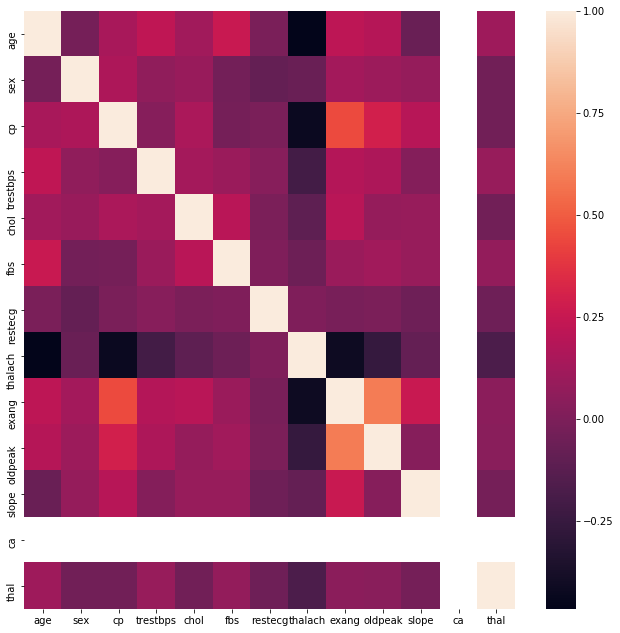

In [43]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [44]:
#build heatmap

cmap = sns.diverging_palette(250, 10, n=3, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\nEW u\Anaconda3\data sc\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Diagnosis
age,1,0.014,0.15,0.25,0.087,0.18,0.052,-0.46,0.24,0.18,-0.037,nan,0.082,0.16,0.16
sex,0.014,1,0.25,0.089,0.028,0.042,-0.1,-0.11,0.15,0.12,0.12,nan,-0.039,0.27,0.27
cp,0.15,0.25,1,0.085,0.13,0.033,-0.018,-0.37,0.49,0.35,0.21,nan,-0.013,0.51,0.51
trestbps,0.25,0.089,0.085,1,0.08,0.095,0.014,-0.18,0.21,0.21,0.025,nan,0.064,0.14,0.14
chol,0.087,0.028,0.13,0.08,1,0.11,0.049,-0.12,0.16,0.11,0.073,nan,-0.032,0.2,0.2
fbs,0.18,0.042,0.033,0.095,0.11,1,0.049,-0.071,0.11,0.062,0.13,nan,0.051,0.16,0.16
restecg,0.052,-0.1,-0.018,0.014,0.049,0.049,1,0.0045,0.045,0.042,-0.017,nan,-0.049,-0.03,-0.03
thalach,-0.46,-0.11,-0.37,-0.18,-0.12,-0.071,0.0045,1,-0.4,-0.3,-0.095,nan,-0.14,-0.33,-0.33
exang,0.24,0.15,0.49,0.21,0.16,0.11,0.045,-0.4,1,0.63,0.25,nan,0.059,0.58,0.58
oldpeak,0.18,0.12,0.35,0.21,0.11,0.062,0.042,-0.3,0.63,1,0.062,nan,0.028,0.55,0.55


### Exploratory Visualization

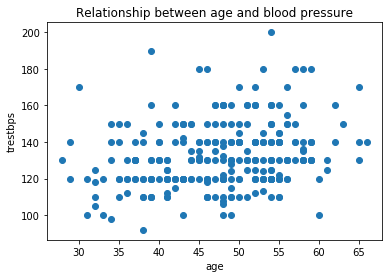

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("age")
plt.ylabel("trestbps")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(df['age'], df['trestbps'])
plt.show()


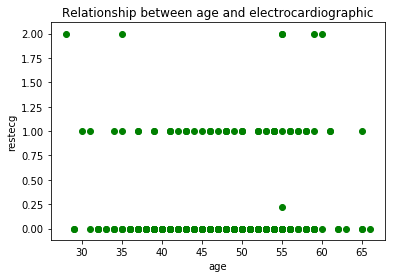

In [46]:
plt.xlabel("age")
plt.ylabel("restecg")

# define title
plt.title("Relationship between age and electrocardiographic")

# plot
plt.scatter(df['age'], df['restecg'], color = 'green')
plt.show()

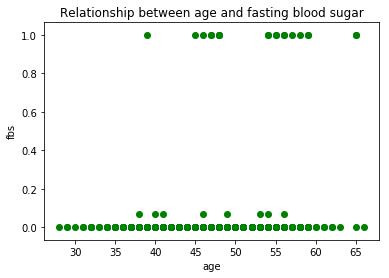

In [47]:
plt.xlabel("age")
plt.ylabel("fbs")

# define title
plt.title("Relationship between age and fasting blood sugar")

# plot
plt.scatter(df['age'], df['fbs'], color = 'green')
plt.show()

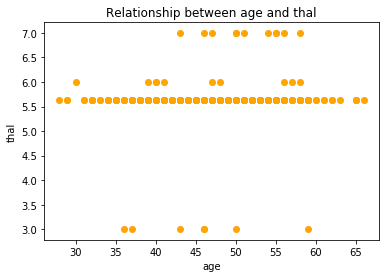

In [48]:
plt.xlabel("age")
plt.ylabel("thal")

# define title
plt.title("Relationship between age and thal")

# plot
plt.scatter(df['age'], df['thal'], color = 'orange')
plt.show()

In [49]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis', 'Diagnosis'],
      dtype='object')

#### search by the correlation between dependent variable and each feature

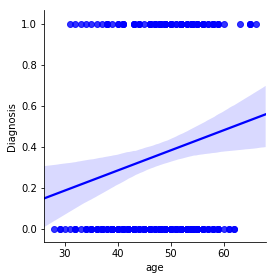

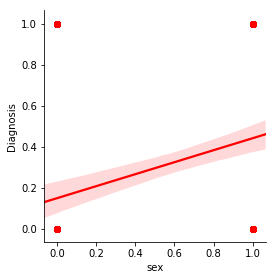

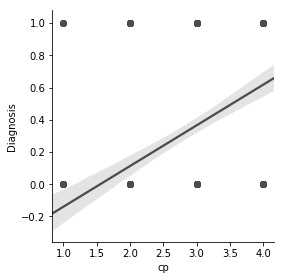

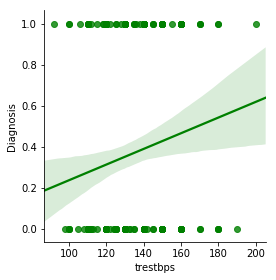

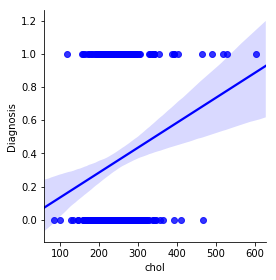

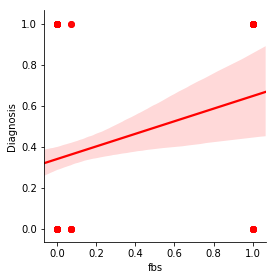

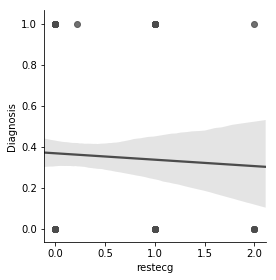

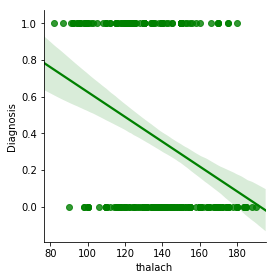

In [50]:


df_1 = df
g1 = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["age"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["sex"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["cp"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["trestbps"], size=4)
gg.map(sns.regplot, color="green")

g1 = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["chol"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["fbs"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["restecg"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["Diagnosis"], x_vars=["thalach"], size=4)
gg.map(sns.regplot, color="green")



### BUILDING MODEL

### MODEL1 :Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier#import decision tree

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [53]:
clf=DecisionTreeClassifier()

In [54]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
new_p=clf.predict(X_test)

In [56]:
print("Accuracy",accuracy_score(y_test,new_p))

Accuracy 0.797752808988764


### MODEL  2 :Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf=RandomForestClassifier(n_estimators=100,random_state=50)

In [59]:
clf=RandomForestClassifier(n_estimators=100,random_state=50)

In [60]:
clf=RandomForestClassifier(n_estimators=100,random_state=50)

In [61]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [62]:
new_P=clf.predict(X_test)

In [63]:
print("Accuracy",accuracy_score(y_test,new_P))

Accuracy 0.8202247191011236


### MODEL  3 : KNN

In [64]:

from sklearn.neighbors import KNeighborsClassifier

In [65]:
model=KNeighborsClassifier(n_neighbors=3)

In [66]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
new_p=model.predict(X_test)

In [68]:
print(new_p)

[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1]


In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [70]:
print("Accuracy:",accuracy_score(y_test,new_p))

Accuracy: 0.651685393258427


### MODEL 4 :SVM

In [71]:
from sklearn.svm import SVC # "Support Vector Classifier" 


In [72]:
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
new_p=clf.predict(X_test)

In [74]:
print(new_p)

[0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0]


In [75]:
print("Accuracy:",accuracy_score(y_test,new_p))

Accuracy: 0.797752808988764
